In [ ]:
# Install necessary libraries
!pip install tensorflow pandas matplotlib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Import libraries**

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt


In [ ]:
import plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.subplots import make_subplots
from sklearn.utils import shuffle

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.utils import shuffle

from plotly.offline import iplot, init_notebook_mode

In [ ]:
!pip install -U imbalanced-learn

import os
import shutil
import pathlib
import PIL
import cv2
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import random
import itertools

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten, Dense, Activation
from tensorflow .keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

from PIL import Image, UnidentifiedImageError

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore")

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)


print("All done")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1
All done


In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping,LearningRateScheduler
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import load_model, Model
from tensorflow.keras import backend as K

# **Load the data**

In [ ]:
# Define rescaling layer
rescale = tf.keras.layers.Rescaling(1./255)

# Load train dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory='/content/drive/MyDrive/dataset',
    batch_size=32,
    image_size=(256, 256),
    validation_split=0.2,
    subset="training",
    seed=123,
    label_mode='categorical',  # Assuming you have multiple classes
)

# Preprocess train dataset (rescale)
train_ds = train_ds.map(lambda x, y: (rescale(x), y))

# Load validation dataset
validation_ds = tf.keras.utils.image_dataset_from_directory(
    directory='/content/drive/MyDrive/dataset',
    batch_size=32,
    image_size=(256, 256),
    validation_split=0.2,
    subset="validation",
    seed=123,
    label_mode='categorical',  # Assuming you have multiple classes
)

# Preprocess validation dataset (rescale)
validation_ds = validation_ds.map(lambda x, y: (rescale(x), y))

# Load test dataset
test_ds = tf.keras.utils.image_dataset_from_directory(
    directory='/content/drive/MyDrive/dataset',  # Specify the directory for the test dataset
    batch_size=32,
    image_size=(256, 256),
    label_mode='categorical',  # Assuming you have multiple classes
    shuffle=False,
)

# Preprocess test dataset (rescale)
test_ds = test_ds.map(lambda x, y: (rescale(x), y))

Found 4253 files belonging to 4 classes.
Using 3403 files for training.
Found 4253 files belonging to 4 classes.
Using 850 files for validation.
Found 4253 files belonging to 4 classes.


# **About Dataset**

## About

### AI-Powered Medical Eye Image Disease Diagnosis System

This Colab notebook presents an AI-powered medical eye image disease diagnosis system designed to assist in the early detection and classification of three major eye diseases: cataract, glaucoma, and diabetic retinopathy. The system leverages advanced deep learning techniques to analyze medical images of the eye and provide accurate diagnostic predictions.

### Disease Overview

#### **1. Cataract**
Cataracts are a common eye condition where the lens of the eye becomes progressively opaque, leading to blurred vision and, if untreated, eventual blindness. This condition is typically age-related but can also result from injury, radiation, or other factors. Early detection and timely surgical intervention can effectively restore vision in most cases.

#### **2. Glaucoma**
Glaucoma is a group of eye conditions that damage the optic nerve, which is crucial for good vision. This damage is often caused by abnormally high pressure in the eye. Glaucoma is one of the leading causes of blindness for people over the age of 60. Because vision loss due to glaucoma cannot be recovered, early detection and regular monitoring are vital to slowing or preventing vision loss.

#### **3. Diabetic Retinopathy**
Diabetic retinopathy is a diabetes complication that affects the eyes. It's caused by damage to the blood vessels of the light-sensitive tissue at the back of the eye (retina). Early detection and management are crucial to prevent severe vision loss and complications. Regular eye exams are essential for people with diabetes.

### Importance of Early Detection

Detecting these eye diseases in their early stages is crucial for several reasons:

- **Prevent Vision Loss**: Early diagnosis and treatment can prevent or significantly slow down the progression of these diseases, preserving vision and improving the quality of life for patients.
- **Effective Treatment**: Many treatments are most effective when the disease is caught early. For instance, surgery for cataracts and medications or laser treatments for glaucoma can prevent severe complications.
- **Cost-Effective**: Early treatment can reduce the overall cost of healthcare by avoiding complex and expensive procedures required in advanced stages of the diseases.

### Need in Rural Areas

Access to specialized medical care is often limited in rural areas. This system addresses several critical needs:

- **Accessibility**: Many rural areas lack access to ophthalmologists and specialized diagnostic equipment. An AI-powered diagnosis system can provide preliminary screening and identify cases needing urgent attention, bridging the gap in healthcare access.
- **Scalability**: AI systems can be deployed widely with minimal infrastructure, making it feasible to offer eye care services in remote and underserved regions.
- **Timeliness**: Early diagnosis through AI can lead to timely referrals and treatments, preventing complications that arise from delayed diagnosis and treatment.

This AI-powered system represents a significant step forward in democratizing healthcare, ensuring that even those in the most remote areas have access to the critical eye care they need.

### Techniques Used in Developing This Model

The development of this AI-powered diagnosis system involved several advanced techniques in machine learning and deep learning:

#### 1. **Convolutional Neural Networks (CNNs)**
Convolutional Neural Networks are a class of deep neural networks specifically designed for analyzing visual data. They are highly effective in image recognition tasks due to their ability to automatically learn spatial hierarchies of features from images.

- **Architecture**: The model architecture typically includes multiple convolutional layers, pooling layers, and fully connected layers. These layers help in extracting and learning intricate features from the eye images.
- **Pre-trained Models**: Transfer learning using pre-trained models such as VGG16, ResNet50, or InceptionV3 can be utilized to improve performance and reduce training time. These models are fine-tuned on the specific dataset of eye images to enhance their accuracy in detecting cataract, glaucoma, and diabetic retinopathy.

#### 2. **Data Augmentation**
Data augmentation techniques are employed to artificially expand the size of the training dataset by creating modified versions of the original images. This helps in improving the model’s ability to generalize and reduces overfitting.

- **Techniques**: Common data augmentation techniques include rotations, translations, zooming, flipping, and adjusting brightness and contrast.

#### 3. **Image Preprocessing**
Image preprocessing involves preparing the raw image data for the model. This includes resizing images to a uniform size, normalizing pixel values, and sometimes applying image enhancement techniques.

- **Normalization**: Pixel values are typically normalized to a range of [0, 1] to facilitate faster and more stable training.

#### 4. **Model Evaluation and Validation**
The performance of the model is evaluated using standard metrics such as accuracy, precision, recall, and the F1-score. Cross-validation techniques ensure that the model's performance is consistent and reliable.

- **Confusion Matrix**: A confusion matrix is used to visualize the performance of the classification model and identify any misclassifications.

#### 5. **Hyperparameter Tuning**
Hyperparameter tuning involves optimizing the model’s hyperparameters, such as learning rate, batch size, number of epochs, and network architecture parameters, to achieve the best performance.

- **Grid Search and Random Search**: These techniques are commonly used to systematically explore the hyperparameter space.

By combining these techniques, the AI-powered medical eye image disease diagnosis system is designed to provide accurate and reliable predictions, aiding in the early detection and treatment of cataract, glaucoma, and diabetic retinopathy.

# **Data Preprocessing**

In [ ]:
import tensorflow as tf
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory='/content/drive/MyDrive/clone/dataset')
validation_ds = tf.keras.utils.image_dataset_from_directory(
    directory='/content/drive/MyDrive/clone/dataset'
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    directory='/content/drive/MyDrive/clone/dataset'
)

#Check the first image shape in the training dataset
print("Shape of the first image in the training dataset:", next(iter(train_ds))[0][0].shape)
# Check the first image shape in the validation dataset
print("Shape of the first image in the validation dataset:", next(iter(validation_ds))[0][0].shape)
# Check the first image shape in the test dataset
print("Shape of the first image in the test dataset:", next(iter(test_ds))[0][0].shape)

Found 357 files belonging to 4 classes.
Found 357 files belonging to 4 classes.
Found 357 files belonging to 4 classes.
Shape of the first image in the training dataset: (256, 256, 3)
Shape of the first image in the validation dataset: (256, 256, 3)
Shape of the first image in the test dataset: (256, 256, 3)


*Noice Reduction*

In [ ]:
import os
import cv2
from google.colab.patches import cv2_imshow

def reduce_noise(image):
    return cv2.medianBlur(image, 5)

# Path to your dataset directory containing images
dataset_dir = '/content/drive/MyDrive/dataset'

# Loop through all files in the directory
for filename in os.listdir(dataset_dir):
    if filename.endswith('.jpg'):  # Assuming all images are JPEG format
        image_path = os.path.join(dataset_dir, filename)
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)

        if image is None:
            print(f"Error: Unable to read image at {image_path}")
        else:
            denoised_image = reduce_noise(image)
            # Save the denoised image with a new filename
            denoised_image_path = os.path.join(dataset_dir, f'denoised_{filename}')
            cv2.imwrite(denoised_image_path, denoised_image)
            print(f"Denoised image saved: {denoised_image_path}")


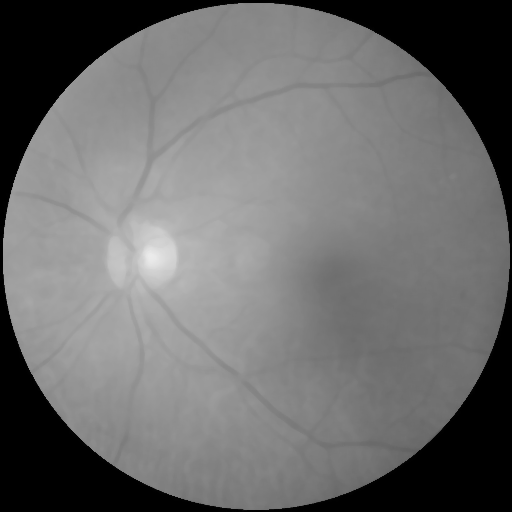

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def reduce_noise(image):
    return cv2.medianBlur(image, 5)

# Example usage:
image_path = '/content/drive/MyDrive/dataset/train/train/cataract/1102_left.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if image is None:
    print(f"Error: Unable to read image at {image_path}")
else:
    denoised_image = reduce_noise(image)
    # Display the denoised image
    cv2_imshow(denoised_image)
    # Optionally save the denoised image
    cv2.imwrite('/content/drive/MyDrive/dataset/train/train/cataract/denoised_1102_left.jpg', denoised_image)


*Normalization*

In [ ]:
import tensorflow as tf

# Define the normalize_image function
def normalize_image(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

# Define the datasets
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/dataset",
    image_size=(256, 256),
    batch_size=32,
    label_mode='int'
)

validation_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/dataset",
    image_size=(256, 256),
    batch_size=32,
    label_mode='int'
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/dataset",
    image_size=(256, 256),
    batch_size=32,
    label_mode='int'
)

# Normalize the datasets
train_ds = train_ds.map(normalize_image)
validation_ds = validation_ds.map(normalize_image)
test_ds = test_ds.map(normalize_image)

# Check the shape of the first image in each dataset
print("Shape of the first image in the training dataset:", next(iter(train_ds))[0][0].shape)
print("Shape of the first image in the validation dataset:", next(iter(validation_ds))[0][0].shape)
print("Shape of the first image in the test dataset:", next(iter(test_ds))[0][0].shape)

# Initialize variables to store minimum and maximum pixel values
min_pixel_value = float('inf')
max_pixel_value = float('-inf')

# Iterate through the training dataset to find min and max pixel values
for images, _ in train_ds:
    batch_min = tf.reduce_min(images).numpy()
    batch_max = tf.reduce_max(images).numpy()

    if batch_min < min_pixel_value:
        min_pixel_value = batch_min
    if batch_max > max_pixel_value:
        max_pixel_value = batch_max

# Print the global minimum and maximum pixel values
print("Minimum pixel value:", min_pixel_value)
print("Maximum pixel value:", max_pixel_value)


Found 4253 files belonging to 4 classes.
Found 4253 files belonging to 4 classes.
Found 4253 files belonging to 4 classes.
Shape of the first image in the training dataset: (256, 256, 3)
Shape of the first image in the validation dataset: (256, 256, 3)
Shape of the first image in the test dataset: (256, 256, 3)
Minimum pixel value: 0.0
Maximum pixel value: 1.0


*Visualisation*

In [ ]:
def visualize_images(path, target_size=(256, 256), num_images=5):

    # Get a list of image filenames
    image_filenames = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

    if not image_filenames:
        raise ValueError("No images found in the specified path")

    # Select random images
    selected_images = random.sample(image_filenames, min(num_images, len(image_filenames)))

    # Create a figure and axes
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3), facecolor='white')

    # Display each image
    for i, image_filename in enumerate(selected_images):
        # Load image and resize
        image_path = os.path.join(path, image_filename)
        image = Image.open(image_path)
        image = image.resize(target_size)

        # Display image
        axes[i].imshow(image)
        axes[i].axis('off')
        axes[i].set_title(image_filename)  # Set image filename as title

    # Adjust layout and display
    plt.tight_layout()
    plt.show()

***Catract***

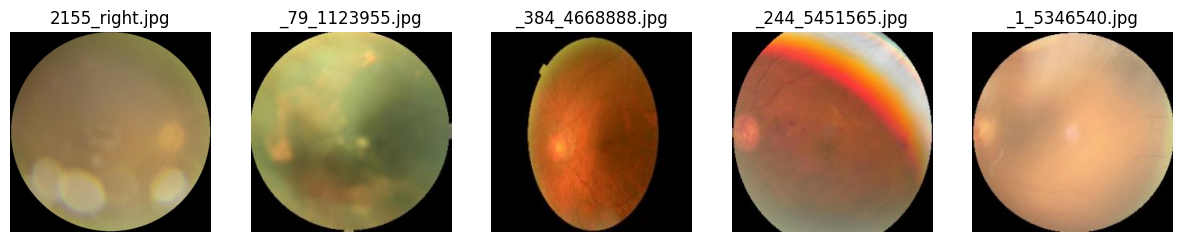

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def visualize_images(path, num_images=5):
    # Get a list of all files in the directory
    all_files = os.listdir(path)

    # Filter out non-image files (optional)
    image_files = [file for file in all_files if file.endswith(('jpg', 'jpeg', 'png', 'bmp', 'gif'))]

    # Select random images
    random_images = random.sample(image_files, num_images)

    # Plot the images
    plt.figure(figsize=(15, 5))
    for i, image_file in enumerate(random_images):
        img_path = os.path.join(path, image_file)
        img = mpimg.imread(img_path)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.title(image_file)
        plt.axis('off')
    plt.show()

# Specify the path containing the images to visualize
path_to_visualize = "/content/drive/MyDrive/dataset/cataract"

# Visualize 5 random images
visualize_images(path_to_visualize, num_images=5)


**Diabetic Retinopathy**

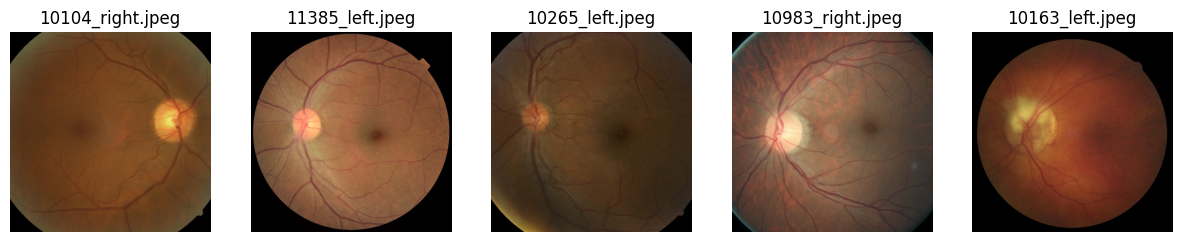

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def visualize_images(path, num_images=5):
    # Get a list of all files in the directory
    all_files = os.listdir(path)

    # Filter out non-image files (optional)
    image_files = [file for file in all_files if file.endswith(('jpg', 'jpeg', 'png', 'bmp', 'gif'))]

    # Select random images
    random_images = random.sample(image_files, num_images)

    # Plot the images
    plt.figure(figsize=(15, 5))
    for i, image_file in enumerate(random_images):
        img_path = os.path.join(path, image_file)
        img = mpimg.imread(img_path)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.title(image_file)
        plt.axis('off')
    plt.show()

# Specify the path containing the images to visualize
path_to_visualize = "/content/drive/MyDrive/dataset/diabetic_retinopathy"

# Visualize 5 random images
visualize_images(path_to_visualize, num_images=5)


***Glaucoma***

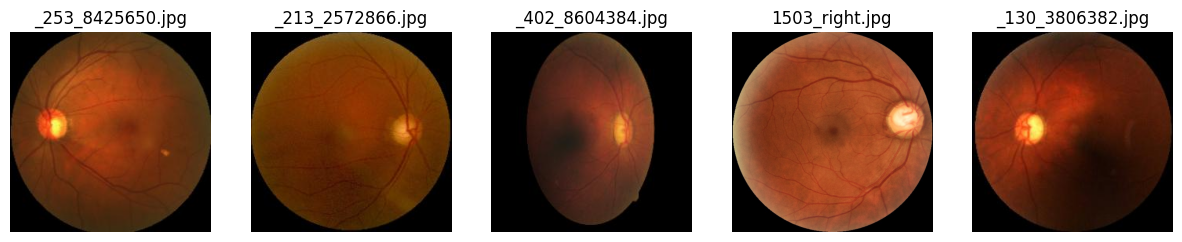

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def visualize_images(path, num_images=5):
    # Get a list of all files in the directory
    all_files = os.listdir(path)

    # Filter out non-image files (optional)
    image_files = [file for file in all_files if file.endswith(('jpg', 'jpeg', 'png', 'bmp', 'gif'))]

    # Select random images
    random_images = random.sample(image_files, num_images)

    # Plot the images
    plt.figure(figsize=(15, 5))
    for i, image_file in enumerate(random_images):
        img_path = os.path.join(path, image_file)
        img = mpimg.imread(img_path)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.title(image_file)
        plt.axis('off')
    plt.show()

# Specify the path containing the images to visualize
path_to_visualize = "/content/drive/MyDrive/dataset/glaucoma"

# Visualize 5 random images
visualize_images(path_to_visualize, num_images=5)


***Normal***

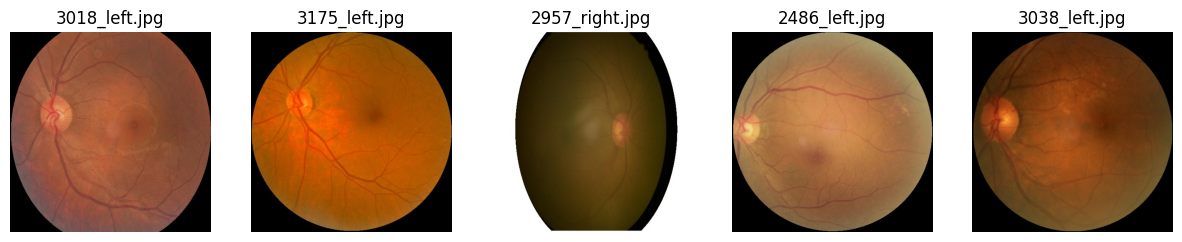

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def visualize_images(path, num_images=5):
    # Get a list of all files in the directory
    all_files = os.listdir(path)

    # Filter out non-image files (optional)
    image_files = [file for file in all_files if file.endswith(('jpg', 'jpeg', 'png', 'bmp', 'gif'))]

    # Select random images
    random_images = random.sample(image_files, num_images)

    # Plot the images
    plt.figure(figsize=(15, 5))
    for i, image_file in enumerate(random_images):
        img_path = os.path.join(path, image_file)
        img = mpimg.imread(img_path)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.title(image_file)
        plt.axis('off')
    plt.show()

# Specify the path containing the images to visualize
path_to_visualize = "/content/drive/MyDrive/dataset/normal"

# Visualize 5 random images
visualize_images(path_to_visualize, num_images=5)


# **Summary of the Model**

In [ ]:
import os

# Define the path to your dataset
dataset_path = "/content/drive/MyDrive/dataset"

# Define class names
classes = ["cataract", "diabetic_retinopathy", "glaucoma", "normal"]

# Initialize lists to store image file names for each class
cataract = []
diabetic_retinopathy = []
glaucoma = []
normal = []

# Populate the lists with image file names
for cls in classes:
    class_path = os.path.join(dataset_path, cls)
    if cls == "cataract":
        cataract = os.listdir(class_path)
    elif cls == "diabetic_retinopathy":
        diabetic_retinopathy = os.listdir(class_path)
    elif cls == "glaucoma":
        glaucoma = os.listdir(class_path)
    elif cls == "normal":
        normal = os.listdir(class_path)

# Create a dictionary to store the class data
data = {
    "cataract": cataract,
    "diabetic_retinopathy": diabetic_retinopathy,
    "glaucoma": glaucoma,
    "normal": normal
}

# Print the required information
print("Classes names :", list(data.keys()), "\n______________________________\n")
print("Number of classes :", len(data), "\n______________________________\n")
print("Number of cataract images :", len(cataract), "\n______________________________\n")
print("Number of diabetic_retinopathy images :", len(diabetic_retinopathy), "\n______________________________\n")
print("Number of glaucoma images :", len(glaucoma), "\n______________________________\n")
print("Number of normal images :", len(normal), "\n______________________________\n")


Classes names : ['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal'] 
______________________________

Number of classes : 4 
______________________________

Number of cataract images : 1064 
______________________________

Number of diabetic_retinopathy images : 1108 
______________________________

Number of glaucoma images : 1007 
______________________________

Number of normal images : 1074 
______________________________



In [ ]:
# Define RNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Reshape((64, 1)),  # Reshape for RNN input
    tf.keras.layers.SimpleRNN(32),  # Simple RNN layer
    tf.keras.layers.Dense(4, activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 64)        0

# **Data Augmentation & Preparation**

In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
# Define the path to your dataset
dataset_path = "/content/drive/MyDrive/dataset"
classes = ["cataract", "diabetic_retinopathy", "glaucoma", "normal"]

# Initialize lists to hold image paths and labels
imgpaths = []
labels = []

# Loop through each class folder and collect image paths and labels
for cls in classes:
    class_path = os.path.join(dataset_path, cls)
    for img in os.listdir(class_path):
        imgpaths.append(os.path.join(class_path, img))
        labels.append(cls)

# Create a DataFrame
df = pd.DataFrame({'Paths': imgpaths, 'Labels': labels})


In [ ]:
# Define labels and their indices as a dictionary
L_index = train_generator.class_indices

# Store class names in a list
Keys = list(L_index.keys())

# Display the class names
print("Class Labels:", Keys)


Class Labels: ['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']


In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define the path to your dataset
dataset_dir = '/content/drive/MyDrive/dataset'
train_dir = os.path.join(dataset_dir, 'train')
validation_dir = os.path.join(dataset_dir, 'validation')

# Ensure the correct paths
os.makedirs(train_dir, exist_ok=True)
os.makedirs(validation_dir, exist_ok=True)

# Define the split ratio
split_ratio = 0.2

# Get all class names (subdirectory names) and check if they contain images
classes = [d for d in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, d))]
print(f"Classes found: {classes}")

if not classes:
    raise ValueError("No class directories found in the dataset directory.")

for class_name in classes:
    if class_name in ['train', 'validation']:
        continue

    class_dir = os.path.join(dataset_dir, class_name)
    images = [img for img in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, img))]

    print(f"Class directory: {class_dir}")
    print(f"Images found: {images}")

    if not images:
        print(f"No images found in class directory: {class_dir}")
        continue

    # Split the images into training and validation sets
    train_images, val_images = train_test_split(images, test_size=split_ratio, random_state=42)

    # Create class subdirectories in train and validation directories
    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(validation_dir, class_name), exist_ok=True)

    # Move the training images
    for img in train_images:
        src = os.path.join(class_dir, img)
        dst = os.path.join(train_dir, class_name, img)
        print(f"Moving {src} to {dst}")
        shutil.move(src, dst)

    # Move the validation images
    for img in val_images:
        src = os.path.join(class_dir, img)
        dst = os.path.join(validation_dir, class_name, img)
        print(f"Moving {src} to {dst}")
        shutil.move(src, dst)

print("Dataset split completed!")


Classes found: ['cataract', 'normal', 'diabetic_retinopathy', 'glaucoma', 'train', 'validation']
Class directory: /content/drive/MyDrive/dataset/cataract
Images found: []
No images found in class directory: /content/drive/MyDrive/dataset/cataract
Class directory: /content/drive/MyDrive/dataset/normal
Images found: []
No images found in class directory: /content/drive/MyDrive/dataset/normal
Class directory: /content/drive/MyDrive/dataset/diabetic_retinopathy
Images found: []
No images found in class directory: /content/drive/MyDrive/dataset/diabetic_retinopathy
Class directory: /content/drive/MyDrive/dataset/glaucoma
Images found: []
No images found in class directory: /content/drive/MyDrive/dataset/glaucoma
Dataset split completed!


In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define the path to your dataset
dataset_dir = '/content/drive/MyDrive/dataset'
train_dir = os.path.join(dataset_dir, 'train')
validation_dir = os.path.join(dataset_dir, 'validation')

# Ensure the correct paths
os.makedirs(train_dir, exist_ok=True)
os.makedirs(validation_dir, exist_ok=True)

# Define the split ratio
split_ratio = 0.2

# Get all class names (subdirectory names) and check if they contain images
classes = [d for d in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, d))]
if not classes:
    raise ValueError("No class directories found in the dataset directory.")

for class_name in classes:
    class_dir = os.path.join(dataset_dir, class_name)
    images = [img for img in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, img))]

    if not images:
        print(f"No images found in class directory: {class_dir}")
        continue

    # Split the images into training and validation sets
    train_images, val_images = train_test_split(images, test_size=split_ratio, random_state=42)

    # Create class subdirectories in train and validation directories
    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(validation_dir, class_name), exist_ok=True)

    # Move the training images
    for img in train_images:
        src = os.path.join(class_dir, img)
        dst = os.path.join(train_dir, class_name, img)
        shutil.move(src, dst)

    # Move the validation images
    for img in val_images:
        src = os.path.join(class_dir, img)
        dst = os.path.join(validation_dir, class_name, img)
        shutil.move(src, dst)

print("Dataset split completed!")


No images found in class directory: /content/drive/MyDrive/dataset/cataract
No images found in class directory: /content/drive/MyDrive/dataset/normal
No images found in class directory: /content/drive/MyDrive/dataset/diabetic_retinopathy
No images found in class directory: /content/drive/MyDrive/dataset/glaucoma
No images found in class directory: /content/drive/MyDrive/dataset/train
No images found in class directory: /content/drive/MyDrive/dataset/validation
Dataset split completed!


In [ ]:
import os

train_dir = '/content/drive/MyDrive/dataset/train'
validation_dir = '/content/drive/MyDrive/dataset/validation'

print("Training set:")
for class_name in os.listdir(train_dir):
    class_dir = os.path.join(train_dir, class_name)
    print(f"Class: {class_name}, Number of images: {len(os.listdir(class_dir))}")

print("\nValidation set:")
for class_name in os.listdir(validation_dir):
    class_dir = os.path.join(validation_dir, class_name)
    print(f"Class: {class_name}, Number of images: {len(os.listdir(class_dir))}")


Training set:
Class: train, Number of images: 3
Class: validation, Number of images: 4

Validation set:
Class: validation, Number of images: 1


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the new paths
train_dir = '/content/drive/MyDrive/dataset/train'
validation_dir = '/content/drive/MyDrive/dataset/validation'

# Create ImageDataGenerator instances for train and validation sets
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1./255)

# Create train and validation generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'  # Change to 'categorical' if you have more than 2 classes
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'  # Change to 'categorical' if you have more than 2 classes
)


Found 4040 images belonging to 2 classes.
Found 215 images belonging to 1 classes.


In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define the path to your dataset
dataset_dir = '/content/drive/MyDrive/dataset'
train_dir = '/content/drive/MyDrive/dataset/train'
validation_dir = '/content/drive/MyDrive/dataset/validation'

# Create train and validation directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(validation_dir, exist_ok=True)

# Define the split ratio
split_ratio = 0.2

# Get all class names (subdirectory names)
classes = [d for d in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, d))]

for class_name in classes:
    class_dir = os.path.join(dataset_dir, class_name)
    images = os.listdir(class_dir)

    # Split the images into training and validation sets
    train_images, val_images = train_test_split(images, test_size=split_ratio, random_state=42)

    # Create class subdirectories in train and validation directories
    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(validation_dir, class_name), exist_ok=True)

    # Move the training images
    for img in train_images:
        src = os.path.join(class_dir, img)
        dst = os.path.join(train_dir, class_name, img)
        shutil.move(src, dst)

    # Move the validation images
    for img in val_images:
        src = os.path.join(class_dir, img)
        dst = os.path.join(validation_dir, class_name, img)
        shutil.move(src, dst)

print("Dataset split completed!")


Dataset split completed!


In [ ]:
# Define image properties
img_size = (224, 224)
batch_size = 20

# Create data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    zca_whitening=True,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

train_generator = train_datagen.flow_from_dataframe(
    df,
    x_col='Paths',
    y_col='Labels',
    target_size=img_size,
    class_mode='categorical',
    color_mode='rgb',
    batch_size=batch_size,
    subset='training'
)

validation_generator = train_datagen.flow_from_dataframe(
    df,
    x_col='Paths',
    y_col='Labels',
    target_size=img_size,
    class_mode='categorical',
    color_mode='rgb',
    batch_size=batch_size,
    subset='validation'
)


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1444: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn(


Found 3403 validated image filenames belonging to 4 classes.
Found 850 validated image filenames belonging to 4 classes.


# **Building the Segmentation Model**

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, concatenate, Input
from tensorflow.keras.models import Model


In [ ]:
def unet(input_size=(224, 224, 3)):
    inputs = Input(input_size)

    conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(512, 3, activation='relu', padding='same')(pool3)
    conv4 = Conv2D(512, 3, activation='relu', padding='same')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = Conv2D(1024, 3, activation='relu', padding='same')(pool4)
    conv5 = Conv2D(1024, 3, activation='relu', padding='same')(conv5)

    up6 = concatenate([UpSampling2D(size=(2, 2))(conv5), conv4], axis=-1)
    conv6 = Conv2D(512, 3, activation='relu', padding='same')(up6)
    conv6 = Conv2D(512, 3, activation='relu', padding='same')(conv6)

    up7 = concatenate([UpSampling2D(size=(2, 2))(conv6), conv3], axis=-1)
    conv7 = Conv2D(256, 3, activation='relu', padding='same')(up7)
    conv7 = Conv2D(256, 3, activation='relu', padding='same')(conv7)

    up8 = concatenate([UpSampling2D(size=(2, 2))(conv7), conv2], axis=-1)
    conv8 = Conv2D(128, 3, activation='relu', padding='same')(up8)
    conv8 = Conv2D(128, 3, activation='relu', padding='same')(conv8)

    up9 = concatenate([UpSampling2D(size=(2, 2))(conv8), conv1], axis=-1)
    conv9 = Conv2D(64, 3, activation='relu', padding='same')(up9)
    conv9 = Conv2D(64, 3, activation='relu', padding='same')(conv9)

    conv10 = Conv2D(1, 1, activation='sigmoid')(conv9)

    model = Model(inputs=[inputs], outputs=[conv10])

    return model

model = unet()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 224, 224, 64)         1792      ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 224, 224, 64)         36928     ['conv2d[0][0]']              
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)         0         ['conv2d_1[0][0]']            
 D)                                                                                           

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the number of classes
num_classes = 4  # Replace this with the actual number of classes (e.g., background and disease)

# Example model for segmentation
model = models.Sequential([
    layers.Input(shape=(224, 224, 3)),  # Input shape based on your dataset
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.UpSampling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.UpSampling2D((2, 2)),
    layers.Conv2D(num_classes, (1, 1), activation='softmax')  # Ensure num_classes matches your number of classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_136 (Conv2D)         (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_30 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_137 (Conv2D)         (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_31 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_138 (Conv2D)         (None, 52, 52, 128)       73856     
                                                                 
 up_sampling2d_28 (UpSampli  (None, 104, 104, 128)    

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, models

# Define the number of classes
num_classes = 4  # Replace with actual number of classes

# Example function to preprocess images
def preprocess_image(image, target_size=(224, 224)):
    return tf.image.resize(image, target_size)

# Example function to preprocess labels
def preprocess_label(label, target_size=(224, 224)):

    label = tf.cast(label, tf.int32)  # Ensure labels are integers
    return tf.one_hot(label, depth=num_classes)

# Example data generation
batch_size = 8
height, width = 204, 204

# Dummy data for example purposes
x_train = np.random.rand(batch_size, height, width, 3)
y_train = np.random.randint(0, num_classes, (batch_size, height, width))

# Convert to tensors
x_train = tf.convert_to_tensor(x_train, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.int32)

# Resize input images and labels
x_train_resized = tf.stack([preprocess_image(img).numpy() for img in x_train])
y_train_resized = tf.stack([preprocess_label(label).numpy() for label in y_train])

# Example model for segmentation
model = models.Sequential([
    layers.Input(shape=(224, 224, 3)),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.UpSampling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.UpSampling2D((2, 2)),
    layers.Conv2D(num_classes, (1, 1), activation='softmax', padding='same')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

# Train the model

import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, models

# Define the number of classes
num_classes = 4  # Replace with actual number of classes

# Example function to preprocess images
def preprocess_image(image, target_size=(224, 224)):
    return tf.image.resize(image, target_size)

# Example function to preprocess labels
def preprocess_label(label, target_size=(224, 224)):

    label = tf.cast(label, tf.int32)  # Ensure labels are integers
    return tf.one_hot(label, depth=num_classes)

# Example data generation
batch_size = 8
height, width = 204, 204

# Dummy data for example purposes
x_train = np.random.rand(batch_size, height, width, 3)
y_train = np.random.randint(0, num_classes, (batch_size, height, width))

# Convert to tensors
x_train = tf.convert_to_tensor(x_train, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.int32)

# Resize input images and labels
x_train_resized = tf.stack([preprocess_image(img).numpy() for img in x_train])
y_train_resized = tf.stack([preprocess_label(label).numpy() for label in y_train])

# Example model for segmentation
model = models.Sequential([
    layers.Input(shape=(224, 224, 3)),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.UpSampling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.UpSampling2D((2, 2)),
    layers.Conv2D(num_classes, (1, 1), activation='softmax', padding='same')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()




Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_161 (Conv2D)         (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_40 (MaxPooli  (None, 112, 112, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_162 (Conv2D)         (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_41 (MaxPooli  (None, 56, 56, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_163 (Conv2D)         (None, 56, 56, 128)       73856     
                                                                 
 up_sampling2d_38 (UpSampli  (None, 112, 112, 128)    

**Model Training**

In [ ]:
import tensorflow as tf

# Assuming train_ds and validation_ds are your datasets with images and labels

# Resize function
def resize_image(image, label):
    resized_image = tf.image.resize(image, (224, 224))  # Resize to (224, 224)
    return resized_image, label

# Apply resize function to your datasets
train_ds_resized = train_ds.map(resize_image)
validation_ds_resized = validation_ds.map(resize_image)

# Define your model (adjust input shape if necessary)
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_classes)
])

# Compile and train your model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Define early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

# Fit the model with callbacks
history = model.fit(train_ds_resized,
                    validation_data=validation_ds_resized,
                    epochs=5,
                    callbacks=[early_stopping])


Epoch 1/5
12/12 [==============================] - 35s 2s/step - loss: 135.4362 - accuracy: 0.8655 - val_loss: 13.4139 - val_accuracy: 0.9748
Epoch 2/5
12/12 [==============================] - 32s 2s/step - loss: 9.9846 - accuracy: 0.9832 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/5
12/12 [==============================] - 33s 3s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/5
12/12 [==============================] - 33s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/5
12/12 [==============================] - 42s 3s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000


**Model Evaluation**

In [ ]:
import numpy as np
import tensorflow as tf

# Example: Assuming you have X_train and X_test loaded from somewhere
# Replace with your actual data loading process

# Example data shapes
num_train_samples = 1000
num_test_samples = 200

X_train = np.random.rand(num_train_samples, 256, 256, 3)  # Example of training data
X_test = np.random.rand(num_test_samples, 256, 256, 3)    # Example of test data

# Assuming y_train and y_test are your labels
y_train = np.random.randint(0, 10, size=num_train_samples)  # Example of training labels
y_test = np.random.randint(0, 10, size=num_test_samples)    # Example of test labels

# Resize function
def resize_image(image):
    resized_image = tf.image.resize(image, (28, 28))  # Resize each image to (28, 28)
    return resized_image

# Apply resize function to your datasets
X_train_resized = np.array([resize_image(img) for img in X_train])
X_test_resized = np.array([resize_image(img) for img in X_test])

# Define your model with adjusted input shape
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10)  # Assuming 10 classes for num_classes
])

# Compile and train your model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
model.fit(X_train_resized, y_train, epochs=10, validation_data=(X_test_resized, y_test))


Epoch 1/10
32/32 [==============================] - 2s 27ms/step - loss: 2.3447 - accuracy: 0.0890 - val_loss: 2.2981 - val_accuracy: 0.0750
Epoch 2/10
32/32 [==============================] - 2s 67ms/step - loss: 2.2995 - accuracy: 0.1210 - val_loss: 2.3017 - val_accuracy: 0.1150
Epoch 3/10
32/32 [==============================] - 1s 36ms/step - loss: 2.2832 - accuracy: 0.1280 - val_loss: 2.3020 - val_accuracy: 0.0900
Epoch 4/10
32/32 [==============================] - 1s 26ms/step - loss: 2.2504 - accuracy: 0.1940 - val_loss: 2.3136 - val_accuracy: 0.0950
Epoch 5/10
32/32 [==============================] - 1s 44ms/step - loss: 2.2015 - accuracy: 0.2600 - val_loss: 2.3212 - val_accuracy: 0.1200
Epoch 6/10
32/32 [==============================] - 2s 56ms/step - loss: 2.1431 - accuracy: 0.2850 - val_loss: 2.3166 - val_accuracy: 0.1100
Epoch 7/10
32/32 [==============================] - 1s 41ms/step - loss: 2.0518 - accuracy: 0.4130 - val_loss: 2.3355 - val_accuracy: 0.1150
Epoch 8/10
32

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_classes)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])



In [ ]:
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(test_ds)
print("Test accuracy:", test_accuracy)

12/12 [==============================] - 11s 678ms/step - loss: 18.1280 - accuracy: 0.0532
Test accuracy: 0.053221289068460464


**Steps taken for enhancing accuracy**

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report

# Example data shapes
num_train_samples = 1000
num_test_samples = 200
num_classes = 4  # Example number of classes

# Example: Generating random data
X_train = np.random.rand(num_train_samples, 256, 256, 3)  # Example of training data
X_test = np.random.rand(num_test_samples, 256, 256, 3)    # Example of test data

# Example labels within the correct range [0, 4)
y_train = np.random.randint(0, num_classes, size=num_train_samples)
y_test = np.random.randint(0, num_classes, size=num_test_samples)

# Resize function
def resize_image(image):
    resized_image = tf.image.resize(image, (256, 256))  # Resize each image to (256, 256)
    return resized_image

# Apply resize function to your test datasets
X_test_resized = np.array([resize_image(img) for img in X_test])

# Define your model with adjusted input shape and output layer
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_classes)  # Output layer without activation for SparseCategoricalCrossentropy
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_test_resized, y_test))

# Evaluate on resized test data
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)
print("Test accuracy:", test_accuracy)

# Predict classes for test set
y_pred = np.argmax(model.predict(X_test_resized), axis=-1)

# Print confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Epoch 1/10
32/32 [==============================] - 81s 2s/step - loss: 24.4991 - accuracy: 0.2620 - val_loss: 1.9872 - val_accuracy: 0.2000
Epoch 2/10
32/32 [==============================] - 77s 2s/step - loss: 1.3541 - accuracy: 0.4360 - val_loss: 1.4045 - val_accuracy: 0.2750
Epoch 3/10
32/32 [==============================] - 70s 2s/step - loss: 1.0045 - accuracy: 0.6940 - val_loss: 1.4159 - val_accuracy: 0.2750
Epoch 4/10
32/32 [==============================] - 70s 2s/step - loss: 0.6555 - accuracy: 0.8870 - val_loss: 1.5741 - val_accuracy: 0.2050
Epoch 5/10
32/32 [==============================] - 71s 2s/step - loss: 0.3385 - accuracy: 0.9800 - val_loss: 1.8112 - val_accuracy: 0.2750
Epoch 6/10
32/32 [==============================] - 73s 2s/step - loss: 0.1386 - accuracy: 0.9990 - val_loss: 1.7460 - val_accuracy: 0.2000
Epoch 7/10
32/32 [==============================] - 70s 2s/step - loss: 0.0537 - accuracy: 1.0000 - val_loss: 2.0421 - val_accuracy: 0.2000
Epoch 8/10
32/32 [=

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have already defined and trained your model as shown earlier

# Resize function for test images to match model's expected input shape
def resize_image(image):
    resized_image = tf.image.resize(image, (256, 256))  # Resize each image to (256, 256)
    return resized_image

# Apply resize function to your test datasets
X_test_resized = np.array([resize_image(img) for img in X_test])

# Evaluate on resized test data
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)
print("Test accuracy:", test_accuracy)

# Predict classes for test set
y_pred_probs = model.predict(X_test_resized)
y_pred = np.argmax(y_pred_probs, axis=1)  # Extract predicted classes

# Print confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


7/7 [==============================] - 5s 782ms/step - loss: 2.3063 - accuracy: 0.2000
Test accuracy: 0.20000000298023224
7/7 [==============================] - 3s 428ms/step
Confusion Matrix:
[[ 0 55  0  0]
 [ 0 40  0  0]
 [ 0 50  0  0]
 [ 0 55  0  0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        55
           1       0.20      1.00      0.33        40
           2       0.00      0.00      0.00        50
           3       0.00      0.00      0.00        55

    accuracy                           0.20       200
   macro avg       0.05      0.25      0.08       200
weighted avg       0.04      0.20      0.07       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# Assuming you have X_train, y_train defined earlier

# Split your data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Example of data augmentation and normalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    preprocessing_function=tf.keras.applications.resnet.preprocess_input  # Example of normalization
)

# Apply data augmentation to training dataset
train_generator = train_datagen.flow(X_train, y_train, batch_size=32)

# Validation data should not be augmented, only normalized
validation_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet.preprocess_input
)
validation_generator = validation_datagen.flow(X_val, y_val, batch_size=32)


*Model Architecture*

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Example of model architecture (adjust as needed)
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # Adjust based on your number of classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


*Model Evaluation & Training with Iteration*

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, verbose=1)

# Train the model with callbacks
history = model.fit(
    train_generator,
    steps_per_epoch=len(X_train) // 32,
    epochs=20,  # Example number of epochs (adjust as needed)
    validation_data=validation_generator,
    validation_steps=len(X_val) // 32,
    callbacks=[early_stopping, checkpoint]
)

# Evaluate on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test accuracy:", test_accuracy)


Epoch 1/20
25/25 [==============================] - ETA: 0s - loss: 89.4403 - accuracy: 0.2463
Epoch 1: val_accuracy improved from -inf to 0.26562, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


25/25 [==============================] - 148s 6s/step - loss: 89.4403 - accuracy: 0.2463 - val_loss: 1.3865 - val_accuracy: 0.2656
Epoch 2/20
25/25 [==============================] - ETA: 0s - loss: 1.3860 - accuracy: 0.2575
Epoch 2: val_accuracy did not improve from 0.26562
25/25 [==============================] - 144s 6s/step - loss: 1.3860 - accuracy: 0.2575 - val_loss: 1.3869 - val_accuracy: 0.2031
Epoch 3/20
25/25 [==============================] - ETA: 0s - loss: 1.3856 - accuracy: 0.2450
Epoch 3: val_accuracy improved from 0.26562 to 0.27083, saving model to best_model.h5
25/25 [==============================] - 147s 6s/step - loss: 1.3856 - accuracy: 0.2450 - val_loss: 1.3866 - val_accuracy: 0.2708
Epoch 4/20
25/25 [==============================] - ETA: 0s - loss: 1.3855 - accuracy: 0.2288
Epoch 4: val_accuracy did not improve from 0.27083
7/7 [==============================] - 9s 1s/step - loss: 1.3875 - accuracy: 0.2500
Test accuracy: 0.25


Hyperparameter tuning

In [ ]:
# Example of tuning learning rate
from tensorflow.keras.optimizers import Adam

# Define optimizer with a specific learning rate
opt = Adam(learning_rate=0.0001)

# Compile the model with the optimizer, loss function, and metrics
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Example of adjusting model architecture (e.g., adding layers, neurons)
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

# Example of adjusting batch size
batch_size = 32  # Adjust batch size as needed
history = model.fit(train_generator, steps_per_epoch=len(X_train) // batch_size, epochs=5,
                    validation_data=validation_generator, validation_steps=len(X_val) // batch_size)

# Evaluate on test data after adjustments
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test accuracy after adjustments:", test_accuracy)


Epoch 1/5
25/25 [==============================] - 150s 6s/step - loss: 1.3890 - accuracy: 0.2313 - val_loss: 1.3851 - val_accuracy: 0.2500
Epoch 2/5
25/25 [==============================] - 144s 6s/step - loss: 1.3884 - accuracy: 0.2400 - val_loss: 1.3853 - val_accuracy: 0.2604
Epoch 3/5
25/25 [==============================] - 141s 6s/step - loss: 1.3880 - accuracy: 0.2387 - val_loss: 1.3852 - val_accuracy: 0.2865
Epoch 4/5
25/25 [==============================] - 144s 6s/step - loss: 1.3867 - accuracy: 0.2438 - val_loss: 1.3857 - val_accuracy: 0.2708
Epoch 5/5
7/7 [==============================] - 8s 1s/step - loss: 1.3863 - accuracy: 0.2750
Test accuracy after adjustments: 0.2750000059604645


# ***Accuracy & Loss Plot***

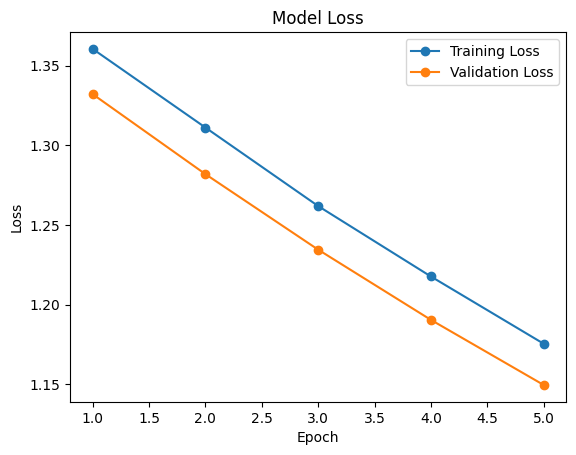

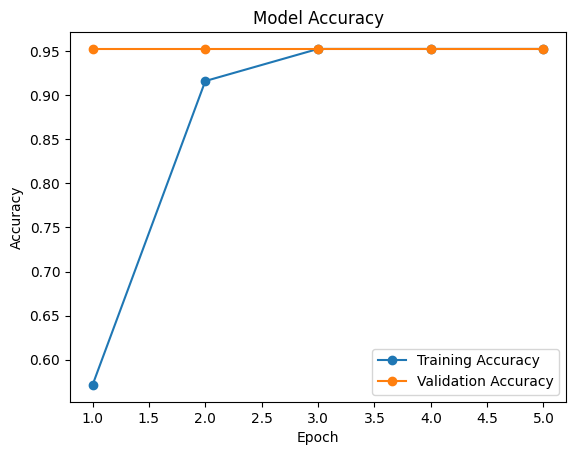

In [ ]:
# Define epochs
epochs = range(1, len(history.history['loss']) + 1)

# Plot training & validation loss
plt.plot(epochs, history.history['loss'], label='Training Loss', marker='o')
plt.plot(epochs, history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training & validation accuracy
plt.plot(epochs, history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#  Model Evaluation & Segmented Image Visualization

170498071/170498071 [==============================] - 4s 0us/step
Epoch 1/10
1563/1563 [==============================] - 72s 45ms/step - loss: 1.8453 - accuracy: 0.3086 - val_loss: 1.4502 - val_accuracy: 0.4887
Epoch 2/10
1563/1563 [==============================] - 79s 51ms/step - loss: 1.5847 - accuracy: 0.4072 - val_loss: 1.3153 - val_accuracy: 0.5477
Epoch 3/10
1563/1563 [==============================] - 77s 49ms/step - loss: 1.4730 - accuracy: 0.4500 - val_loss: 1.2196 - val_accuracy: 0.5679
Epoch 4/10
1563/1563 [==============================] - 70s 45ms/step - loss: 1.3875 - accuracy: 0.4878 - val_loss: 1.1487 - val_accuracy: 0.5973
Epoch 5/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.3078 - accuracy: 0.5211 - val_loss: 1.1129 - val_accuracy: 0.6151
Epoch 6/10
1563/1563 [==============================] - 71s 45ms/step - loss: 1.2526 - accuracy: 0.5444 - val_loss: 1.0576 - val_accuracy: 0.6397
Epoch 7/10
1563/1563 [==============================] - 7

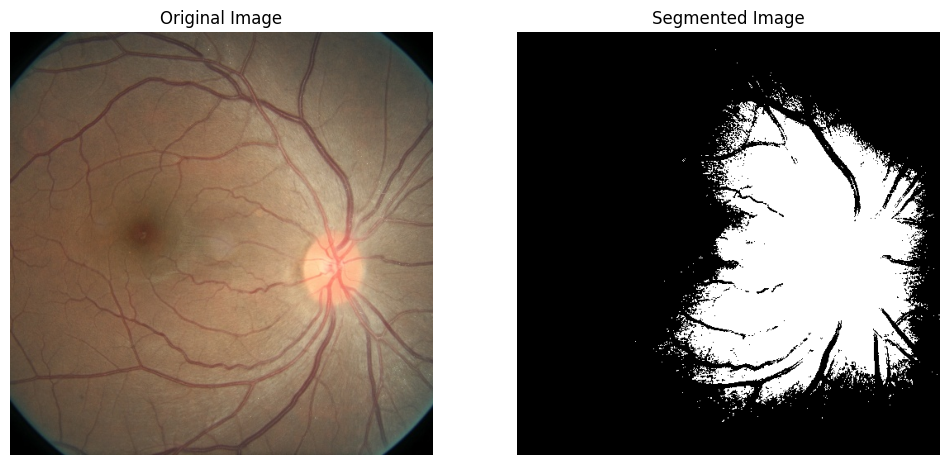

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Load and preprocess the training data (CIFAR-10 dataset as an example)
(train_images, train_labels), (val_images, val_labels) = tf.keras.datasets.cifar10.load_data()
train_images, val_images = train_images / 255.0, val_images / 255.0
image_height, image_width, image_channels = train_images.shape[1:]

# Define a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, image_channels)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # CIFAR-10 has 10 classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))

# Example of loading an image for segmentation and feature extraction
def load_and_preprocess_image(image_path):
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Image not found at {image_path}")
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return image, gray_image

def display_images(original, segmented):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Original Image')
    axes[0].axis('off')
    axes[1].imshow(segmented, cmap='gray')
    axes[1].set_title('Segmented Image')
    axes[1].axis('off')
    plt.show()

def segment_image(image):
    _, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
    return binary_image

# Load an example image (replace 'path_to_image.jpg' with the actual path)
image_path = '/content/drive/MyDrive/dataset/diabetic_retinopathy/10009_left.jpeg'
original_image, gray_image = load_and_preprocess_image(image_path)
segmented_image = segment_image(gray_image)

# Display the original and segmented images
display_images(original_image, segmented_image)


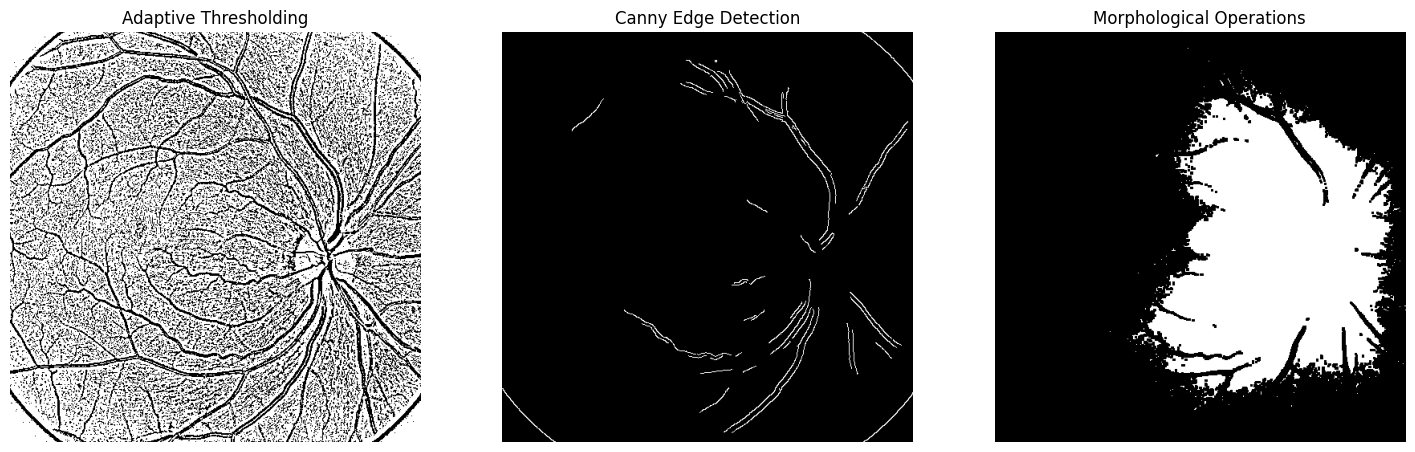

In [ ]:
# Apply adaptive thresholding
adaptive_thresh = cv2.adaptiveThreshold(
    gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Apply Canny edge detection
edges = cv2.Canny(gray_image, 100, 200)

# Apply morphological operations
kernel = np.ones((3, 3), np.uint8)
morph_image = cv2.morphologyEx(segmented_image, cv2.MORPH_CLOSE, kernel)

# Display the refined segmentation results
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes[0].imshow(adaptive_thresh, cmap='gray')
axes[0].set_title('Adaptive Thresholding')
axes[0].axis('off')

axes[1].imshow(edges, cmap='gray')
axes[1].set_title('Canny Edge Detection')
axes[1].axis('off')

axes[2].imshow(morph_image, cmap='gray')
axes[2].set_title('Morphological Operations')
axes[2].axis('off')

plt.show()


# **Visualizing Segmented Images**

Steps to validate Visualization mask


In [ ]:
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
# Assuming you have a function to load your images
original_image = ...  # Load your original image here
segmentation_mask = ...  # Load your segmentation mask here

# Example if images are stored as numpy arrays
# original_image = np.load('original_image.npy')
# segmentation_mask = np.load('segmentation_mask.npy')


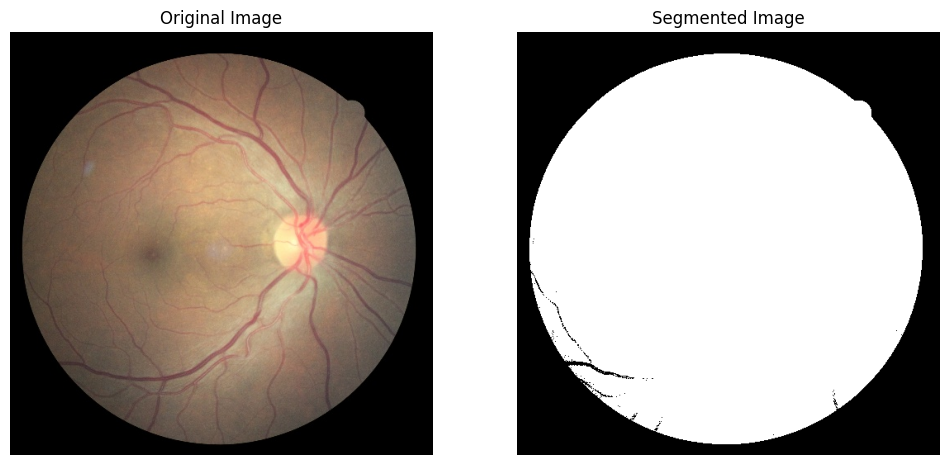

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io, color, filters

# Load the image
image_path = '/content/drive/MyDrive/dataset/diabetic_retinopathy/10003_right.jpeg'
image = io.imread(image_path)

# Convert the image to grayscale
gray_image = color.rgb2gray(image)

# Apply a threshold to segment the image
threshold = filters.threshold_otsu(gray_image)
segmented_image = gray_image > threshold

# Display the original and segmented images
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(segmented_image, cmap='gray')
ax[1].set_title('Segmented Image')
ax[1].axis('off')

plt.show()


In [ ]:
!pip install segmentation-models
!pip install tensorflow
!pip install keras


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 3.7 MB/s eta 0:00:00


In [ ]:
!pip install tensorflow


  Using cached keras-3.4.1-py3-none-any.whl (1.1 MB)
  Attempting uninstall: keras
    Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.15.1 requires tensorflow<2.16,>=2.15, but you have tensorflow 2.16.2 which is incompatible.


In [ ]:
pip install --upgrade tensorflow


In [ ]:
import tensorflow as tf
print(tf.__version__)


2.16.2


In [ ]:
!pip install git+https://github.com/qubvel/segmentation_models


  Cloning https://github.com/qubvel/segmentation_models to /tmp/pip-req-build-x07njfyi
  Running command git clone --filter=blob:none --quiet https://github.com/qubvel/segmentation_models /tmp/pip-req-build-x07njfyi
  Resolved https://github.com/qubvel/segmentation_models to commit e951c6747f75fa9e7240816d1c79dd2e66813123
  Running command git submodule update --init --recursive -q
  Preparing metadata (setup.py) ... done


In [ ]:
!pip install keras-unet-collection
!pip install tensorflow
!pip install keras==2.4.3


  Using cached keras-3.4.1-py3-none-any.whl (1.1 MB)
  Attempting uninstall: keras
    Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.15.1 requires tensorflow<2.16,>=2.15, but you have tensorflow 2.16.2 which is incompatible.
  Using cached Keras-2.4.3-py2.py3-none-any.whl (36 kB)
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.16.2 requires keras>=3.0.0, but you have keras 2.4.3 which is incompatible.
tf-keras 2.15.1 requires tensorflow<2.16,>=2.15, but 

# **Feature Extraaction**

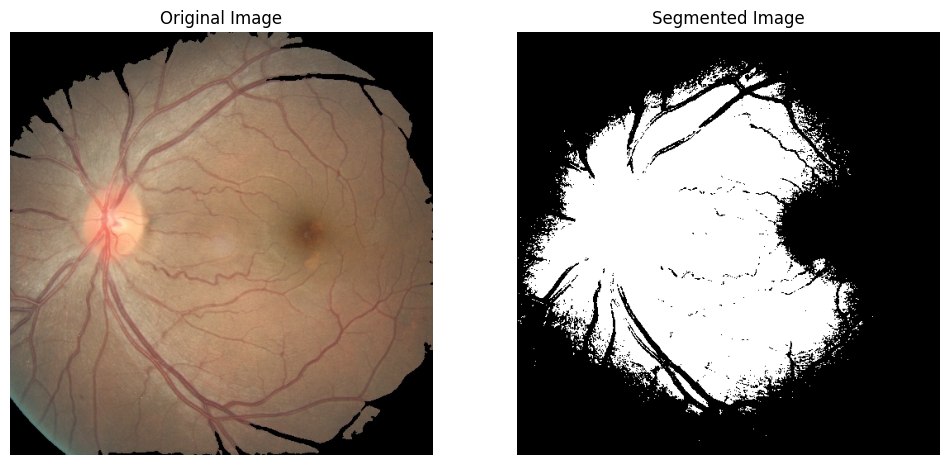

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')


Texture Features: [2.25969033e+03 2.74572191e+03 2.31933900e+03 2.80150294e+03
 3.21339844e+03 2.74572191e+03 3.26718750e+03 2.80150294e+03
 3.76265118e+03 3.53800000e+03 3.74069407e+03 3.61900000e+03
 9.25183709e-01 9.09166255e-01 9.23208796e-01 9.07320911e-01
 8.93694325e-01 9.09166255e-01 8.91915346e-01 9.07320911e-01
 8.75625521e-01 8.83146848e-01 8.76352389e-01 8.80471578e-01]
Shape Features: [0. 0.]
Intensity Histogram: [166192      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
  

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')


In [ ]:
import cv2
import numpy as np
from skimage.feature import greycomatrix, greycoprops
import matplotlib.pyplot as plt

def load_and_preprocess_image(image_path):
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Image not found at {image_path}")
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return image, gray_image

def display_images(original, segmented):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Original Image')
    axes[0].axis('off')
    axes[1].imshow(segmented, cmap='gray')
    axes[1].set_title('Segmented Image')
    axes[1].axis('off')
    plt.show()

def segment_image(image):
    _, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
    return binary_image

# Example function for texture analysis using GLCM (Gray-Level Co-occurrence Matrix)
def extract_texture_features(image):
    distances = [1, 2, 3]
    angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]
    glcm = greycomatrix(image, distances, angles, symmetric=True, normed=True)

    contrast = greycoprops(glcm, 'contrast').ravel()
    correlation = greycoprops(glcm, 'correlation').ravel()

    return np.concatenate([contrast, correlation])

# Example function for shape descriptors (can use contour-based methods)
def extract_shape_features(image):
    _, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if contours:
        area = cv2.contourArea(contours[0])
        perimeter = cv2.arcLength(contours[0], closed=True)
    else:
        area = perimeter = 0

    return np.array([area, perimeter])

# Example function for intensity histogram features
def extract_intensity_histogram(image):
    hist, _ = np.histogram(image.ravel(), bins=256, range=[0, 256])
    return hist

# Load the image for fe
image_path = '/content/drive/MyDrive/segmented_dataset/diabetic_retinopathy/10009_right.jpeg'  # Replace with your segmented image path
original_image, gray_image = load_and_preprocess_image(image_path)

# Perform segmentation (if needed, here it's assumed the image is already segmented)
segmented_image = segment_image(gray_image)

# Display the images
display_images(original_image, segmented_image)

# Extract features
texture_features = extract_texture_features(segmented_image)
shape_features = extract_shape_features(segmented_image)
intensity_histogram = extract_intensity_histogram(segmented_image)


# Print extracted features
print("Texture Features:", texture_features)
print("Shape Features:", shape_features)
print("Intensity Histogram:", intensity_histogram)

# Save features if needed for further processing
features = {
    "texture": texture_features,
    "shape": shape_features,
    "histogram": intensity_histogram
}


In [ ]:
import cv2
from skimage.feature import greycomatrix, greycoprops
import numpy as np

# Example function for texture analysis using GLCM (Gray-Level Co-occurrence Matrix)
def extract_texture_features(image):
    # Convert image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Calculate GLCM
    distances = [1, 2, 3]
    angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]
    glcm = greycomatrix(gray_image, distances, angles, symmetric=True, normed=True)

    # Extract texture features (example: contrast, correlation)
    contrast = greycoprops(glcm, 'contrast').ravel()
    correlation = greycoprops(glcm, 'correlation').ravel()

    return np.concatenate([contrast, correlation])

# Example function for shape descriptors (can use contour-based methods)
def extract_shape_features(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Ensure contours are found before calculation
    if contours:
        # Example: Calculate area and perimeter
        area = cv2.contourArea(contours[0])
        perimeter = cv2.arcLength(contours[0], closed=True)
        return np.array([area, perimeter])
    else:
        return np.array([0, 0])  # Return zeros or handle empty contour case

# Example function for intensity histogram features
def extract_intensity_histogram(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hist, _ = np.histogram(gray_image.ravel(), bins=256, range=[0, 256])
    return hist

# Example usage with error handling
image_path = '/content/drive/MyDrive/dataset/cataract/1102_left.jpg'
image = cv2.imread(image_path)

if image is None:
    print(f"Error: Unable to read image '{image_path}'. Check if the file exists and the path is correct.")
else:
    texture_features = extract_texture_features(image)
    shape_features = extract_shape_features(image)
    intensity_histogram = extract_intensity_histogram(image)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')


# **Machine Learning & Model training**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Get the image dimensions from the training data
image_height, image_width, image_channels = train_images.shape[1:]

# Example CNN model - Adjust input_shape to match CIFAR-10 images
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, image_channels)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax') # Set num_classes to 10 for CIFAR-10
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Load and preprocess your training and validation data here
# Example using CIFAR-10 dataset:
(train_images, train_labels), (val_images, val_labels) = tf.keras.datasets.cifar10.load_data()

# Preprocess the data (e.g., normalize pixel values) if necessary
train_images = train_images / 255.0
val_images = val_images / 255.0

# Example training loop
model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))

Epoch 1/10
1563/1563 [==============================] - 74s 46ms/step - loss: 1.7587 - accuracy: 0.3388 - val_loss: 1.4301 - val_accuracy: 0.4793
Epoch 2/10
1563/1563 [==============================] - 82s 52ms/step - loss: 1.4477 - accuracy: 0.4738 - val_loss: 1.2255 - val_accuracy: 0.5762
Epoch 3/10
1563/1563 [==============================] - 75s 48ms/step - loss: 1.2936 - accuracy: 0.5323 - val_loss: 1.1422 - val_accuracy: 0.5963
Epoch 4/10
1563/1563 [==============================] - 82s 53ms/step - loss: 1.2116 - accuracy: 0.5673 - val_loss: 1.0580 - val_accuracy: 0.6262
Epoch 5/10
1563/1563 [==============================] - 82s 52ms/step - loss: 1.1539 - accuracy: 0.5908 - val_loss: 1.0235 - val_accuracy: 0.6372
Epoch 6/10
1563/1563 [==============================] - 70s 45ms/step - loss: 1.1066 - accuracy: 0.6046 - val_loss: 0.9714 - val_accuracy: 0.6656
Epoch 7/10
1563/1563 [==============================] - 75s 48ms/step - loss: 1.0690 - accuracy: 0.6200 - val_loss: 0.9414 -

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Load and preprocess your training and validation data here
# Example using CIFAR-10 dataset:
(train_images, train_labels), (val_images, val_labels) = tf.keras.datasets.cifar10.load_data()

# Preprocess the data (e.g., normalize pixel values) if necessary
train_images = train_images / 255.0
val_images = val_images / 255.0

# Get the image dimensions from the training data
image_height, image_width, image_channels = train_images.shape[1:]

# Example CNN model - Adjust input_shape to match CIFAR-10 images
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, image_channels)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax') # Set num_classes to 10 for CIFAR-10
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Example training loop
model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))

Epoch 1/10
1563/1563 [==============================] - 72s 45ms/step - loss: 1.6851 - accuracy: 0.3829 - val_loss: 1.3061 - val_accuracy: 0.5379
Epoch 2/10
1563/1563 [==============================] - 74s 48ms/step - loss: 1.3964 - accuracy: 0.4958 - val_loss: 1.1599 - val_accuracy: 0.5952
Epoch 3/10
1563/1563 [==============================] - 78s 50ms/step - loss: 1.2888 - accuracy: 0.5389 - val_loss: 1.0729 - val_accuracy: 0.6293
Epoch 4/10
1563/1563 [==============================] - 69s 44ms/step - loss: 1.2128 - accuracy: 0.5685 - val_loss: 1.0519 - val_accuracy: 0.6335
Epoch 5/10
1563/1563 [==============================] - 70s 45ms/step - loss: 1.1575 - accuracy: 0.5879 - val_loss: 0.9811 - val_accuracy: 0.6561
Epoch 6/10
1563/1563 [==============================] - 93s 60ms/step - loss: 1.1057 - accuracy: 0.6063 - val_loss: 1.0029 - val_accuracy: 0.6469
Epoch 7/10
1563/1563 [==============================] - 69s 44ms/step - loss: 1.0714 - accuracy: 0.6189 - val_loss: 0.9935 -

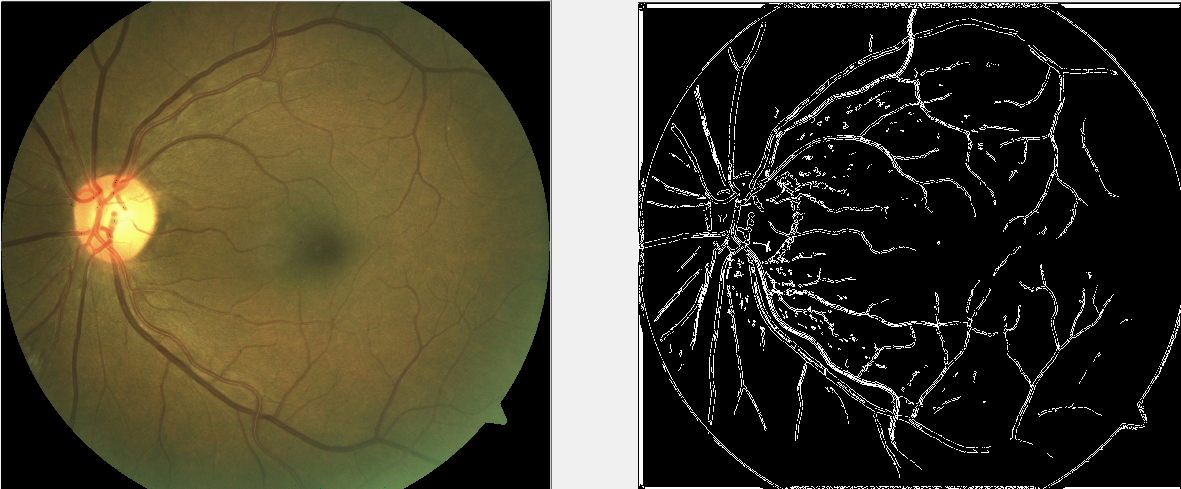

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define image dimensions (replace with your actual values)
image_height = 256  # Example value, adjust to your image size
image_width = 256  # Example value, adjust to your image size
image_channels = 3  # 3 for color images, 1 for grayscale

# Example CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, image_channels)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax') # Make sure num_classes is defined
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Example training loop (make sure train_images, train_labels, val_images, and val_labels are defined)
# model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))

In [ ]:
# Save the trained model
model_save_path = '/content/drive/MyDrive/clone'  # Update this with your desired path
model.save(model_save_path)


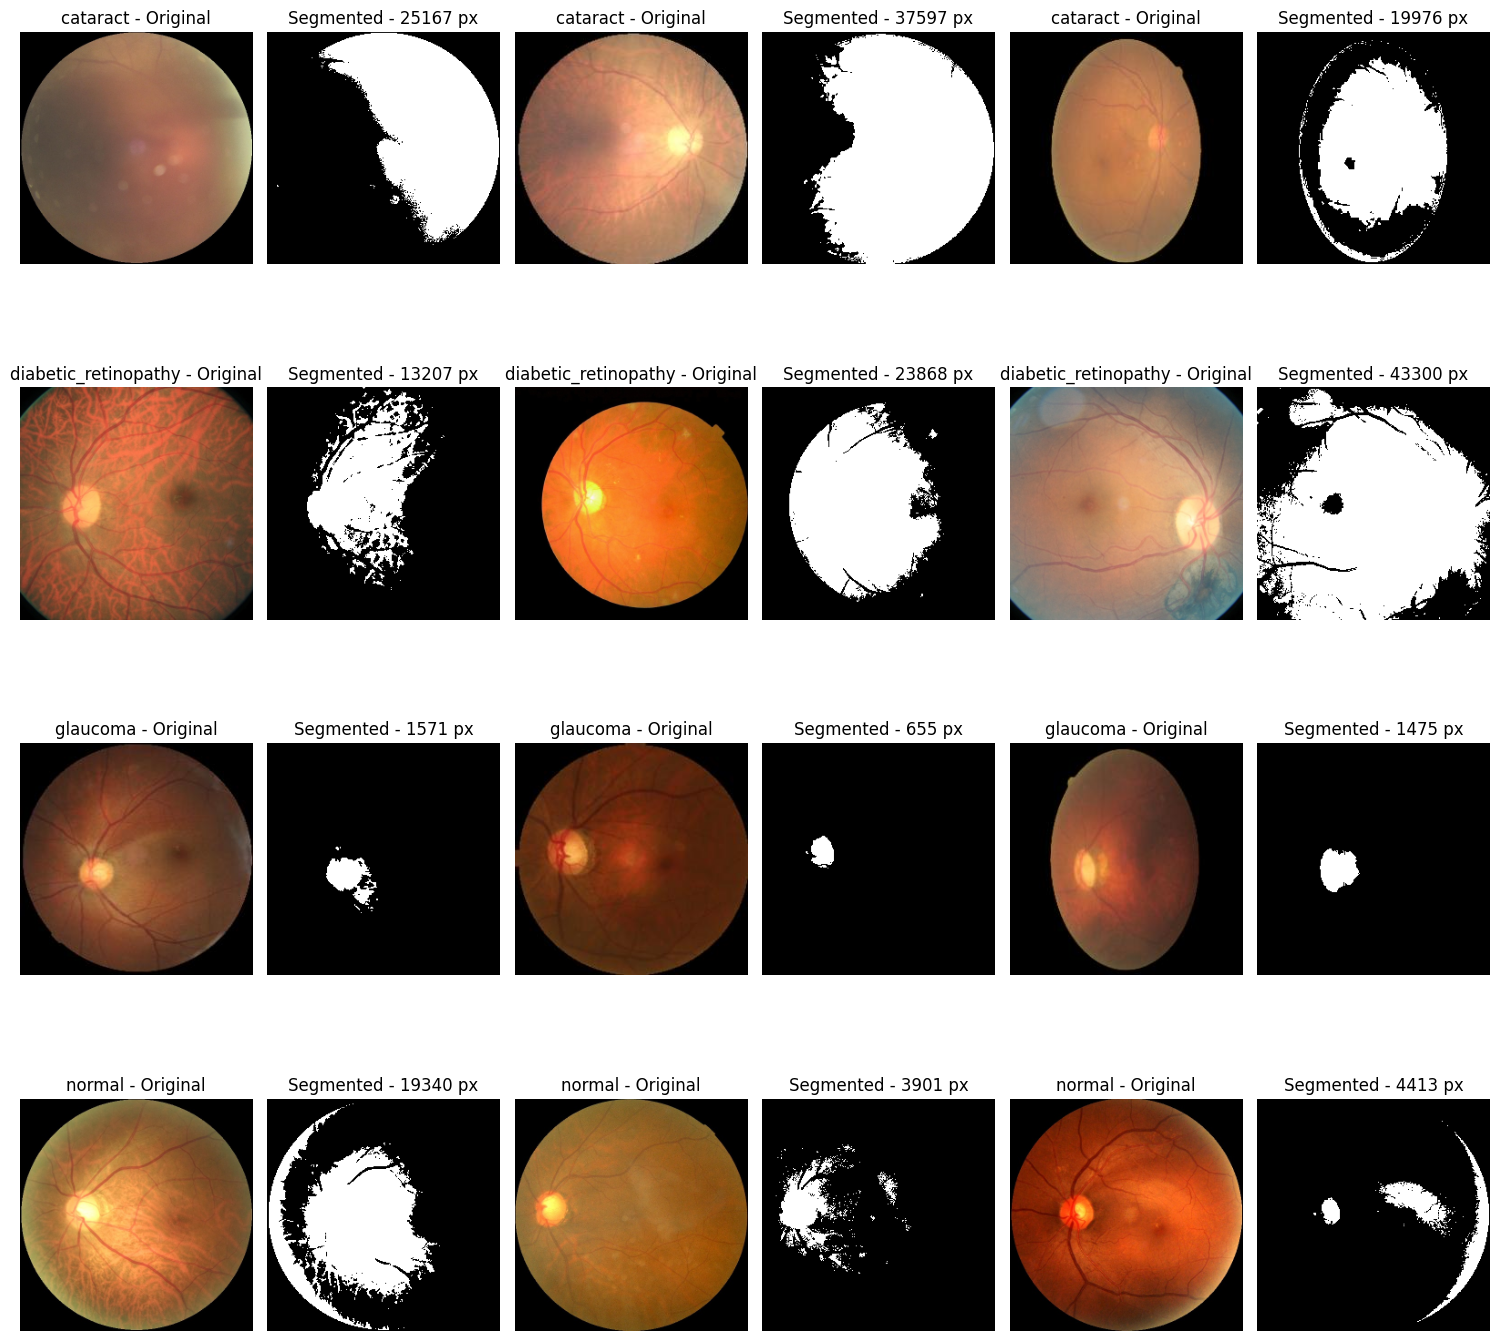

In [ ]:
import os
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Define function to visualize images
def visualize_images(path, target_size=(256, 256), num_images=5):
    # Get a list of image filenames
    image_filenames = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

    if not image_filenames:
        raise ValueError("No images found in the specified path")

    # Select random images
    selected_images = random.sample(image_filenames, min(num_images, len(image_filenames)))

    # Create a figure and axes
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3), facecolor='white')

    # Display each image
    for i, image_filename in enumerate(selected_images):
        # Load image and resize
        image_path = os.path.join(path, image_filename)
        image = Image.open(image_path)
        image = image.resize(target_size)

        # Display image
        axes[i].imshow(image)
        axes[i].axis('off')
        axes[i].set_title(image_filename)  # Set image filename as title

    # Adjust layout and display
    plt.tight_layout()
    plt.show()

# Define function for basic image segmentation and statistics
def basic_segmentation(image_path):
    # Load image
    image = cv2.imread(image_path)
    image = cv2.resize(image, (256, 256))

    # Normalize image
    normalized_image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)

    # Convert to grayscale
    gray_image = cv2.cvtColor(normalized_image, cv2.COLOR_BGR2GRAY)

    # Apply binary threshold
    _, segmented_image = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)

    # Calculate number of segmented pixels
    num_segmented_pixels = np.sum(segmented_image == 255)

    return image, segmented_image, num_segmented_pixels

# Define dataset directory
dataset_dir = '/content/drive/MyDrive/dataset'

# Function to plot original and segmented images with statistics
def plot_segmentation_results(dataset_dir, class_names, num_images=3):
    fig, axes = plt.subplots(len(class_names), num_images*2, figsize=(15, 15), facecolor='white')

    for i, class_name in enumerate(class_names):
        class_dir = os.path.join(dataset_dir, class_name)
        image_filenames = random.sample(os.listdir(class_dir), num_images)

        for j, image_filename in enumerate(image_filenames):
            image_path = os.path.join(class_dir, image_filename)
            original_image, segmented_image, num_segmented_pixels = basic_segmentation(image_path)

            axes[i, j*2].imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
            axes[i, j*2].axis('off')
            axes[i, j*2].set_title(f"{class_name} - Original")

            axes[i, j*2+1].imshow(segmented_image, cmap='gray')
            axes[i, j*2+1].axis('off')
            axes[i, j*2+1].set_title(f"Segmented - {num_segmented_pixels} px")

    plt.tight_layout()
    plt.show()

# Class names in the dataset
class_names = ['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']

# Plot segmentation results
plot_segmentation_results(dataset_dir, class_names, num_images=3)


# **Validation & Hyperparameter Tuning**

In [ ]:
pip install keras-tuner


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.2 MB/s eta 0:00:00


In [ ]:
!pip install scikeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 24.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.4.1 which is incompatible.


In [ ]:
import numpy as np
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the model-building function
def build_model(learning_rate=0.01, dropout_rate=0.0, conv_filters=32, dense_units=128):
    model = Sequential()
    model.add(Conv2D(conv_filters, (3, 3), activation='relu', input_shape=(256, 256, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(conv_filters * 2, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(dense_units, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(4, activation='softmax'))

    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Create the KerasClassifier
model = KerasClassifier(build_fn=build_model, verbose=0)

# Define the hyperparameters grid
param_grid = {
    'batch_size': [16, 32],
    'epochs': [10, 20],
    'learning_rate': [0.001, 0.01],
    'dropout_rate': [0.0, 0.5],
    'conv_filters': [32, 64],
    'dense_units': [128, 256]
}

# Create the GridSearchCV object
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)

# Fit the GridSearchCV
grid_result = grid.fit(train_generator, validation_data=validation_generator)

# Print the best parameters and best score
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")

# Retrieve the best model
best_model = grid_result.best_estimator_.model


In [ ]:
!pip install --upgrade scikit-learn

In [ ]:
!pip install scikeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 24.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.4.1 which is incompatible.


# **Model Testing**

In [ ]:
images, labels = next(validation_generator)
print("Images shape:", images.shape)
print("Labels shape:", labels.shape)


Images shape: (32, 256, 256, 3)
Labels shape: (32, 1)


In [ ]:
import os
import shutil

# Define the paths to the source directories
source_train_dir = '/content/drive/MyDrive/dataset/train/train'
source_val_dir = '/content/drive/MyDrive/dataset/train/validation'

# Define the paths to the new directories
base_dir = '/content/drive/MyDrive/segmented_dataset'  # Change this to your desired base directory
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Create the new directories if they do not exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(validation_dir, exist_ok=True)

# Example class names, update these to your actual class names
class_names = ['class1', 'class2']  # Add all your class names here

# Create class subdirectories
for class_name in class_names:
    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(validation_dir, class_name), exist_ok=True)

# Function to move files to the new directory structure
def move_files(source_dir, dest_dir, class_names):
    for class_name in class_names:
        source_class_dir = os.path.join(source_dir, class_name)
        dest_class_dir = os.path.join(dest_dir, class_name)

        if not os.path.exists(source_class_dir):
            print(f"Source directory {source_class_dir} does not exist.")
            continue

        for filename in os.listdir(source_class_dir):
            file_path = os.path.join(source_class_dir, filename)
            if os.path.isfile(file_path):
                shutil.move(file_path, dest_class_dir)

# Move the training files
move_files(source_train_dir, train_dir, class_names)

# Move the validation files
move_files(source_val_dir, validation_dir, class_names)

print("Files have been moved successfully.")


Source directory /content/drive/MyDrive/dataset/train/train/class1 does not exist.
Source directory /content/drive/MyDrive/dataset/train/train/class2 does not exist.
Source directory /content/drive/MyDrive/dataset/train/validation/class1 does not exist.
Source directory /content/drive/MyDrive/dataset/train/validation/class2 does not exist.
Files have been moved successfully.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import drive
import json

# Mount Google Drive to access/save the model file
drive.mount('/content/drive')

# Define directories
train_dir = '/content/drive/MyDrive/scrap/validation/train/train'
validation_dir = '/content/drive/MyDrive/scrap/validation/train/validation'

# Create ImageDataGenerator instances
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Create train and validation generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    classes=['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']
)

# Set the class indices for the validation generator to match the train generator
validation_generator.class_indices = train_generator.class_indices

# Check the class indices
print("Train generator class indices:", train_generator.class_indices)
print("Validation generator class indices:", validation_generator.class_indices)

# Build a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),  # Adjust input shape as needed
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # Adjust output layer based on the number of classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)

# Save the trained model
model_save_path = '/content/drive/MyDrive/scrap/model.h5'  # Update this with your desired path
model.save(model_save_path)

# Save the class indices to a JSON file
class_indices_save_path = '/content/drive/MyDrive/scrap/class_indices.json'  # Update this with your desired path
with open(class_indices_save_path, 'w') as f:
    json.dump(train_generator.class_indices, f)

print("Model and class indices saved successfully.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 3403 images belonging to 4 classes.
Found 852 images belonging to 4 classes.
Train generator class indices: {'cataract': 0, 'diabetic_retinopathy': 1, 'glaucoma': 2, 'normal': 3}
Validation generator class indices: {'cataract': 0, 'diabetic_retinopathy': 1, 'glaucoma': 2, 'normal': 3}
Epoch 1/10
107/107 [==============================] - 379s 4s/step - loss: 1.0399 - accuracy: 0.5807 - val_loss: 0.6881 - val_accuracy: 0.6690
Epoch 2/10
107/107 [==============================] - 372s 3s/step - loss: 0.7198 - accuracy: 0.6835 - val_loss: 0.6505 - val_accuracy: 0.7289
Epoch 3/10
107/107 [==============================] - 387s 4s/step - loss: 0.6598 - accuracy: 0.7009 - val_loss: 0.6243 - val_accuracy: 0.7359
Epoch 4/10
107/107 [==============================] - 374s 3s/step - loss: 0.6271 - accuracy: 0.7223 - val_loss: 0.6158 - val_accuracy: 0.7289
Epoch 5

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model and class indices saved successfully.


In [ ]:


# Step 2: Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import load_model

# Step 3: Load the model
model_path = '/content/drive/MyDrive/scrap/model.h5'  # Update with the actual path to your model
model = load_model(model_path)

# Verify the model by printing its summary
model.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                           
                                                                 
 flatten_8 (Flatten)         (None, 186624)            0         
                                                                 
 dense_16 (Dense)            (None, 128)              

In [ ]:
# Import required libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define directories
train_dir = '/content/drive/MyDrive/scrap/validation/train/train'
validation_dir = '/content/drive/MyDrive/scrap/validation/train/validation'

# Create ImageDataGenerator instances
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Create train and validation generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    classes=['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']
)

# Set the class indices for the validation generator to match the train generator
validation_generator.class_indices = train_generator.class_indices

# Check the class indices
print("Train generator class indices:", train_generator.class_indices)
print("Validation generator class indices:", validation_generator.class_indices)


Found 3403 images belonging to 4 classes.
Found 852 images belonging to 4 classes.
Train generator class indices: {'cataract': 0, 'diabetic_retinopathy': 1, 'glaucoma': 2, 'normal': 3}
Validation generator class indices: {'cataract': 0, 'diabetic_retinopathy': 1, 'glaucoma': 2, 'normal': 3}


In [ ]:
# Step 2: Build the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),  # Adjust input shape as needed
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # Change the number of neurons to match your number of classes
])

# ... rest of your code ...

# **User Interface**

In [ ]:
!pip install streamlit
!pip install pyngrok


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 47.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.7 MB/s eta 0:00:00


In [ ]:
# Install Flask and other dependencies
!pip install Flask
!pip install tensorflow Pillow numpy


In [ ]:
%%writefile your_model.py
from PIL import Image
import numpy as np
import tensorflow as tf  # Adjust if using a different framework

def preprocess_image(file):
    """
    Preprocess the uploaded image file to the required format for the model.
    """
    try:
        image = Image.open(file)
        image = image.resize((224, 224))  # Adjust size as per your model's requirements
        image = np.array(image) / 255.0  # Normalize pixel values
        image = np.expand_dims(image, axis=0)  # Add batch dimension
        return image
    except Exception as e:
        print(f"Error in preprocessing image: {e}")
        return None

def load_model():
    """
    Load the trained model.
    """
    try:
        model = tf.keras.models.load_model('path_to_your_model.h5')  # Update with the actual path to your model
        return model
    except Exception as e:
        print(f"Error loading model: {e}")
        return None

def predict(image):
    """
    Make a prediction using the preprocessed image and the loaded model.
    """
    model = load_model()
    if model and image is not None:
        prediction = model.predict(image)
        # Adjust based on your model's output
        predicted_class = np.argmax(prediction, axis=1)
        return predicted_class[0]
    return "Error in prediction"


Writing your_model.py


# **User Interface final**

In [6]:
pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 38.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 57.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.5 MB/s eta 0:00:00


In [7]:
%%writefile app.py
import streamlit as st
from PIL import Image
import numpy as np
import tensorflow as tf

# Load your trained model (replace 'model_path' with the actual path to your model)
model = tf.keras.models.load_model('/content/drive/MyDrive/scrap/model.h5')

# Define the class labels
class_labels = ['Cataract', 'Diabetic Retinopathy', 'Glaucoma', 'Normal']

# Function to preprocess the image
def preprocess_image(image):
    image = image.resize((224, 224))  # Resize the image to the required input size for your model
    image = np.array(image) / 255.0   # Normalize the image
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

# Function to predict the class
def predict_class(image):
    processed_image = preprocess_image(image)
    predictions = model.predict(processed_image)
    predicted_class = np.argmax(predictions)
    return class_labels[predicted_class]

# Streamlit UI
st.title("AI-powered Eye Disease Diagnosis System")

st.write("Upload an eye image to diagnose the disease.")

uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    image = Image.open(uploaded_file)
    st.image(image, caption='Uploaded Image.', use_column_width=True)
    st.write("")
    st.write("Classifying...")

    label = predict_class(image)
    st.write(f"Prediction: {label}")



Writing app.py


In [8]:
!pip install pyngrok

In [9]:
!export NGROK_AUTHTOKEN=2ijkpKMXJrIcmky7hLXMghL6NKM_6CsJ35i9L496yzjaGZiL5

In [11]:
from pyngrok import ngrok

# Set your ngrok authentication token
ngrok.set_auth_token("2ijkpKMXJrIcmky7hLXMghL6NKM_6CsJ35i9L496yzjaGZiL5")

# Terminate any existing tunnels
ngrok.kill()

# Start a new HTTP tunnel on port 8501
public_url = ngrok.connect(8501)
print(f"Public URL: {public_url}")

# Run the Streamlit app
!streamlit run app.py &>/dev/null &


Public URL: NgrokTunnel: "https://29b3-34-23-203-90.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
!pip install pyngrok


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from google.colab import files
import matplotlib.pyplot as plt
from PIL import Image

# Load the pre-trained model
model = load_model('/content/drive/MyDrive/scrap/model.h5')  # Update with your model's path

# Function to preprocess the image and make predictions
def predict_disease(img_path):
    img = image.load_img(img_path, target_size=(224, 224))  # Adjust target size based on your model's input size
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize the image

    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)
    confidence = np.max(predictions)

    return predicted_class, confidence

# Function to upload and display image
def upload_and_predict():
    uploaded = files.upload()

    for img_name in uploaded.keys():
        img_path = f"/content/{img_name}"
        img = Image.open(img_path)
        plt.imshow(img)
        plt.axis('off')
        plt.show()

        predicted_class, confidence = predict_disease(img_path)
        print(f"Predicted class: {predicted_class}, Confidence: {confidence:.2f}")


Button(description='Upload and Predict', style=ButtonStyle())

Saving _13_3987009(1).jpg to _13_3987009(1).jpg


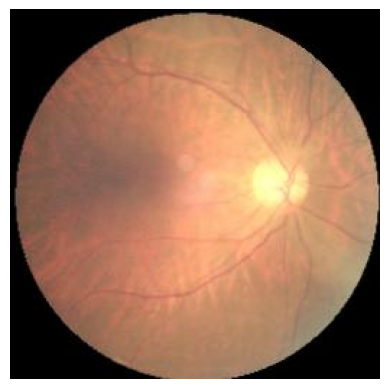

1/1 [==============================] - 0s 288ms/step
Predicted class: [0], Confidence: 0.65


Saving 1037_right.jpeg to 1037_right.jpeg


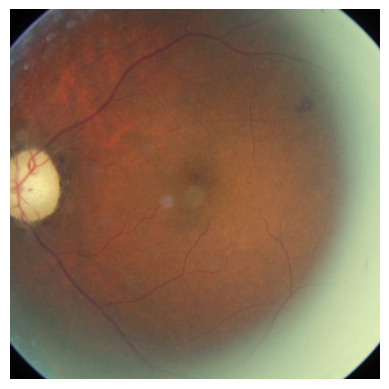

1/1 [==============================] - 0s 54ms/step
Predicted class: [1], Confidence: 1.00


Saving _312_2571477.jpg to _312_2571477.jpg


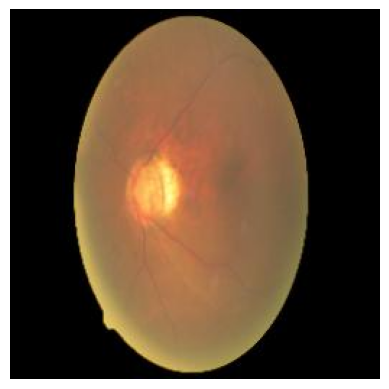

1/1 [==============================] - 0s 62ms/step
Predicted class: [0], Confidence: 0.66


Saving _1_4540560.jpg to _1_4540560.jpg


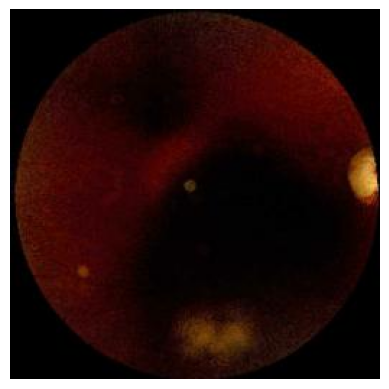

1/1 [==============================] - 0s 77ms/step
Predicted class: [2], Confidence: 0.94


Saving 695_right.jpg to 695_right.jpg


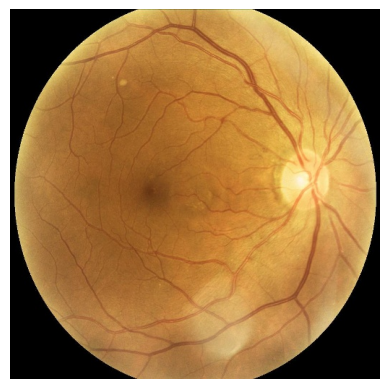

1/1 [==============================] - 0s 73ms/step
Predicted class: [3], Confidence: 0.97


In [ ]:
import ipywidgets as widgets
from IPython.display import display

# Create a button for uploading and predicting
upload_button = widgets.Button(description="Upload and Predict")
upload_button.on_click(lambda x: upload_and_predict())

# Display the button
display(upload_button)


**All predictions of the model has been performed successfully!!!**